

<div class="container">
  <center><img width="200" height="200" alt="Image" src="https://up6.cc/2026/01/176863368784061.png" /></center>
</div>

# Data Science Blog Project
#### Alaa Alaboud
#### Saudi Arabia/Dhahran
#### 2026 January
<br>

<br/>

## 1. Business Understanding

The goal of this project is to explore and analyze patterns in new business formation across the United States using monthly data, and to build a predictive model that estimates future business creation activity. Understanding how and when new businesses are formed provides valuable insight into broader economic conditions and entrepreneurial behavior.

A central focus of this analysis is the impact of the COVID-19 pandemic on business formation. The pandemic represents a major economic shock that disrupted labor markets, consumer behavior, and business operations. By examining business formation data before, during, and after the COVID-19 period, this project seeks to identify whether business creation declined, rebounded, or experienced structural changes as a result of the crisis.

In addition to exploratory analysis, the project addresses a practical prediction task. The dataset does not include values for December 2025, making it a suitable candidate for forecasting. Using historical trends and simple temporal features, a supervised regression model is developed to estimate the number of newly created businesses for this missing future month.

#### The main questions guiding this project are:
- How has business formation activity changed over time across U.S. states?
- What patterns can be observed before, during, and after the COVID-19 period?
- Can a simple supervised learning model produce a reasonable prediction for future business formation activity?

## 2. Data Undersatnding

In this section, we focus on understanding the structure and content of the dataset used in this project. 
The analysis is based on a single monthly dataset that provides statistics on new business formations in the United States. 
We begin by describing the dataset and its key variables, followed by an exploratory analysis to assess data quality and structure.

### 2.1.Dataset Description

The dataset used in this project is the **Business Formation Statistics (BFS) monthly dataset** published by the **U.S. Census Bureau**. 
The file **bfs_monthly.csv** contains aggregated monthly counts of newly created businesses across U.S. states and time periods.

For this analysis, the following columns are particularly relevant:

- **geo:** Represents the geographic level of observation. Each value corresponds to a U.S. state, while the code 'US' represents the national aggregate. 
  In this project, the national-level observations (US) are excluded to focus on state-level patterns.

- **naics_sector:** Indicates the industry sector classification based on NAICS codes. 
  The dataset includes multiple sector codes, as well as the value 'TOTAL', which represents all sectors combined. 
  This analysis focuses on the TOTAL category to capture overall business formation activity.

- **year:** Indicates the calendar year of each observation. While the dataset spans multiple years starting from 2004, this analysis focuses on the period from 2013 to 2025 to enable a balanced comparison before and after the COVID-19 pandemic.

- The dataset is reported at a **monthly frequency**, with individual columns representing each month. These monthly columns are reshaped into a long format during the data preparation stage.


### 2.2 Data Exploration

In this section, we perform an initial exploration of the dataset to understand its structure, data types, and potential data quality issues.

In [1]:
# Import all libraries needs
import pandas as pd
import numpy as np
#from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
#import math
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [2]:
# Losd the raw BFS dataset
raw_df =pd.read_csv('data/bfs_monthly.csv')

In [3]:
# Inspect the raw dataset structure and columns
raw_df.head()

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,U,TOTAL,BA_BA,US,2025,497030,440230,497911,583054,425867,428742,513785,428937,445513,538984,426289,NaN
1,U,NAICS11,BA_BA,US,2025,5141,4258,4398,4679,3128,3041,3539,3019,2884,3222,2686,NaN
2,U,NAICS21,BA_BA,US,2025,547,472,511,575,407,416,497,420,470,516,455,NaN
3,U,NAICS22,BA_BA,US,2025,689,663,697,789,594,595,684,663,572,647,572,NaN
4,U,NAICS23,BA_BA,US,2025,49525,44621,47136,56485,40657,39051,45141,38607,37052,45203,33700,NaN


In [4]:
# Check the overall size of the dataset (number of rows and columns)
raw_df.shape

(35189, 17)

In [5]:
# Examine data types and identify potential type conversion needs 
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35189 entries, 0 to 35188
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sa            35189 non-null  object
 1   naics_sector  35189 non-null  object
 2   series        35189 non-null  object
 3   geo           35189 non-null  object
 4   year          35189 non-null  int64 
 5   jan           33228 non-null  object
 6   feb           33228 non-null  object
 7   mar           33228 non-null  object
 8   apr           33228 non-null  object
 9   may           33228 non-null  object
 10  jun           33228 non-null  object
 11  jul           34908 non-null  object
 12  aug           34908 non-null  object
 13  sep           34908 non-null  object
 14  oct           34908 non-null  object
 15  nov           34908 non-null  object
 16  dec           33684 non-null  object
dtypes: int64(1), object(16)
memory usage: 4.6+ MB


In [6]:
# Inspect the last rows to verify data completeness and time coverage
raw_df.tail()

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
35184,U,TOTAL,BF_DUR8Q,WA,2004,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.22,1.50,1.13,1.20,1.51
35185,U,TOTAL,BF_DUR8Q,WV,2004,NaN,NaN,NaN,NaN,NaN,NaN,1.03,1.28,1.50,0.93,1.00,1.34
35186,U,TOTAL,BF_DUR8Q,WI,2004,NaN,NaN,NaN,NaN,NaN,NaN,1.04,1.32,1.60,1.33,1.31,1.72
35187,U,TOTAL,BF_DUR8Q,WY,2004,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0.90,1.46,1.09,0.89,1.51
35188,U,TOTAL,BF_DUR8Q,PR,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Identify missing values across all columns
raw_df.isnull().sum()

sa                 0
naics_sector       0
series             0
geo                0
year               0
jan             1961
feb             1961
mar             1961
apr             1961
may             1961
jun             1961
jul              281
aug              281
sep              281
oct              281
nov              281
dec             1505
dtype: int64

In [8]:
# Explore the distribution of sector categories in the dataset
raw_df['naics_sector'].value_counts()

naics_sector
TOTAL       26049
NAICS53       457
NAICS81       457
NAICS72       457
NAICS71       457
NAICS62       457
NAICS61       457
NAICS56       457
NAICS55       457
NAICS54       457
NAICS52       457
NAICS11       457
NAICS51       457
NAICSTW       457
NAICSRET      457
NAICS42       457
NAICSMNF      457
NAICS23       457
NAICS22       457
NAICS21       457
NONAICS       457
Name: count, dtype: int64

#### Recap

The dataset used in this project is derived from the U.S. Census Bureau’s Business Formation Statistics and contains monthly observations spanning from 2004 to 2025. Each record includes information on the geographic area, year, month, and the number of newly created businesses.

To better evaluate the impact of the COVID-19 pandemic, the analysis focuses on a subset of the data covering the period from 2013 to 2025. This time window provides a balanced comparison, capturing approximately six years before the pandemic and six years after, which allows for clearer interpretation of changes in business formation patterns.

The dataset reports aggregate business formation activity across all sectors and includes geographic information at the state and regional levels. Notably, December 2025 is missing from the dataset and is therefore treated as a future value to be predicted in the modeling stage.

## 3. Data Preparation

### 3.1 Filtering Data

In this step, the dataset is filtered to define the analytical scope of the project.<p/>
Specifically, national-level observations **(US)** are ***excluded*** to focus on state-level patterns, and the analysis period is ***restricted*** to the years **2013–2025** to enable meaningful comparisons before and after the COVID-19 pandemic.

In [9]:
def exclude_us(df):
    """
    Exclude national-level observations ('US') to focus on state-level data.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing a 'geo' column.

    Returns
    -------
    pd.DataFrame
        Filtered DataFrame without rows where geo == 'US'.
    """
    return df[df["geo"] != "US"].copy()

In [10]:
# Exclude national-level 'US' observations
df_excluding_us = exclude_us(raw_df)
df_excluding_us.head(2)

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
42,U,TOTAL,BA_BA,NO,2025,74447,62733,71113,80368,60715,62777,73072,60292,60114,73330,59345,NaN
43,A,TOTAL,BA_BA,NO,2025,57153,62357,64739,64375,64457,67965,67127,67401,68391,67897,71527,NaN


In [11]:
def filter_year_range(df, start_year=2013, end_year=2025):
    """
    Restrict the dataset to a specific range of years.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataset containing a 'year' column.
    start_year : int
        First year (inclusive).
    end_year : int
        Last year (inclusive).

    Returns
    -------
    pd.DataFrame
        Dataset Filtered to the selected year range.
    """
    return df[(df["year"] >= start_year) & (df["year"] <= end_year)].copy()

In [12]:
# Restrict the analysis period to 2013–2025
df_year_filtered = filter_year_range(df_excluding_us, start_year=2013, end_year=2025)
df_year_filtered.head(2)

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
42,U,TOTAL,BA_BA,NO,2025,74447,62733,71113,80368,60715,62777,73072,60292,60114,73330,59345,NaN
43,A,TOTAL,BA_BA,NO,2025,57153,62357,64739,64375,64457,67965,67127,67401,68391,67897,71527,NaN


In [13]:
df_year_filtered.tail(2)

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
19941,U,TOTAL,BF_DUR8Q,WY,2013,1.19,1.67,2.07,1.29,1.85,2.17,1.57,2.11,2.10,1.33,1.93,2.08
19942,U,TOTAL,BF_DUR8Q,PR,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Recap

To prepare the dataset for analysis, the national-level observations (US) were excluded to focus on state-level patterns. In addition, the time range was restricted to 2013–2025, providing a balanced comparison window before and after the COVID-19 period.

Following this filtering step, the analysis was further restricted to the TOTAL category in the naics_sector variable. This choice allows the study to focus on overall business formation activity across all sectors rather than sector-specific trends.

### 3.2 Reshaping Data

In this step, the dataset is ***reshaped*** from a **wide** format to a **long** format to facilitate time-series analysis.<P/>
The monthly columns are ***consolidated*** into a single month variable, allowing each observation to represent a specific state, year, and month. 
In addition, month names are ***converted*** into **numeric** values to support chronological ordering and subsequent modeling steps.

In [14]:
def reshape_monthly_data(df):
    """
    Reshape monthly business formation data from wide to long format.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataset containing monthly columns.

    Returns
    -------
    pd.DataFrame
        Long-format dataset with month and value columns.
    """
    
    month_cols = ['jan','feb','mar','apr','may','jun',
                  'jul','aug','sep','oct','nov','dec']

    df_long = df.melt(
        id_vars=['geo', 'year', 'naics_sector'],
        value_vars=month_cols,
        var_name='month_str',
        value_name='value'
    )

    month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }

    df_long['month'] = df_long['month_str'].map(month_map)

    return df_long.copy()

In [15]:
# Reshape monthly data into a long format suitable for time-series analysis
df_long = reshape_monthly_data(df_year_filtered)
df_long.head(2)

,geo,year,naics_sector,month_str,value,month
0,NO,2025,TOTAL,jan,74447,1
1,NO,2025,TOTAL,jan,57153,1


#### Recap

The original dataset was structured in a wide format, with separate columns for each month. To facilitate analysis and modeling, the data was reshaped into a long format so that each row represents a single year–month observation. This transformation clarifies the temporal structure of the data and makes it easier to perform time-series analysis and subsequent data cleaning steps.

### 3.3 Data Cleaning

In this step, data quality issues are addressed to ensure the dataset is suitable for analysis and modeling.<p/>
The month variable is ***converted*** into **numeric** form to support chronological ordering and numerical operations.
**Missing** values are identified and ***handled*** appropriately, with particular attention to incomplete future observations.
Finally, the data is examined to confirm that no **negative** values exist in the business formation counts, as such values would be invalid in this context.

In [16]:
df_clean = df_long.copy()

In [17]:
# Ensure business formation counts are stored as numeric values
df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce')

In [18]:
# Exclude out the Dec 2025
df_long = df_long[~((df_long['year'] == 2025) & (df_long['month'] == 12))].copy()
df_long = df_long.dropna(subset=['value'])
df_long.head()

,geo,year,naics_sector,month_str,value,month
0,NO,2025,TOTAL,jan,74447,1
1,NO,2025,TOTAL,jan,57153,1
2,MW,2025,TOTAL,jan,81058,1
3,MW,2025,TOTAL,jan,61853,1
4,SO,2025,TOTAL,jan,211113,1


In [19]:
def clean_training_data(df):
    """
    Prepare the training dataset by removing the target prediction month
    (December 2025) and dropping rows with missing business formation values.
    """
    df = df.copy()

    # Exclude December 2025 to avoid data leakage (reserved for prediction)
    df = df[~((df["year"] == 2025) & (df["month"] == 12))]

    # Remove rows with missing business formation counts
    df = df.dropna(subset=["value"])

    return df

In [20]:
# Apply final cleaning steps to prepare the training dataset
df_clean = clean_training_data(df_clean)
df_clean.head()

,geo,year,naics_sector,month_str,value,month
0,NO,2025,TOTAL,jan,74447.0,1
1,NO,2025,TOTAL,jan,57153.0,1
2,MW,2025,TOTAL,jan,81058.0,1
3,MW,2025,TOTAL,jan,61853.0,1
4,SO,2025,TOTAL,jan,211113.0,1


In [21]:
# Verify the year range after data cleaning
df_clean['year'].value_counts()

year
2019    14472
2020    14448
2018    14428
2014    14388
2015    14360
2017    14344
2016    14304
2013    14288
2021    12636
2024    10656
2023    10656
2022    10656
2025     9768
Name: count, dtype: int64

In [22]:
# Confirm that no missing values remain after cleaning
df_clean.isnull().sum()

geo             0
year            0
naics_sector    0
month_str       0
value           0
month           0
dtype: int64

In [23]:
# Inspect the final rows of the cleaned dataset
df_clean.tail(2)

,geo,year,naics_sector,month_str,value,month
174045,WI,2013,TOTAL,dec,1.97,12
174046,WY,2013,TOTAL,dec,2.08,12


In [24]:
# Validate that numeric fields contain no negative values
numeric_cols = df_clean.select_dtypes(include='number')
negative_values = (numeric_cols < 0).sum()
negative_values

year     0
value    0
month    0
dtype: int64

#### Recap

The dataset was originally structured in a wide format, with separate columns for each month. 
To facilitate analysis and modeling, the data was reshaped into a long format using the melt function, resulting in one row per state, sector, and month.

December values were intentionally excluded from the training data, as December 2025 is treated as a future prediction target. 
This ensures that the model is trained only on observed data and prevents data leakage.

#### Why not converting NaN to zero

Missing values were not imputed with zeros, as zero represents a meaningful economic value (i.e., no business formation), whereas missing entries indicate unavailable data. 
Therefore, rows with missing values were removed to preserve data integrity.

Finally, basic data validation checks were performed to ensure consistency. The dataset was examined for invalid values, such as negative business formation counts, which are not meaningful in this context. No such inconsistencies were found after validation.

### 3.4 Feature Engineering

In this step, additional features are created to enhance the dataset for modeling.<p/>
These features capture temporal information and important external events that may influence business formation activity. 
Specifically, a **date** feature is ***constructed*** from the year and month variables, and a **COVID-19** indicator is ***introduced*** to distinguish observations during the pandemic period.

In [25]:
# # Create a date feature from year and month for time-series analysis
df_clean['date'] = pd.to_datetime(
    df_clean[['year', 'month']].assign(day=1)
)

df_clean.head(2)

,geo,year,naics_sector,month_str,value,month,date
0,NO,2025,TOTAL,jan,74447.0,1,2025-01-01
1,NO,2025,TOTAL,jan,57153.0,1,2025-01-01


In [26]:
# Create covid period (2019-2020) indicator
df_clean['covid_period'] = df_clean['year'].isin([2019,2020]).astype(int)

# Inspect the engineered features
df_clean[['year', 'month', 'date','covid_period']].drop_duplicates().head(10)

,year,month,date,covid_period
0,2025,1,2025-01-01,0
896,2024,1,2024-01-01,0
1792,2023,1,2023-01-01,0
2688,2022,1,2022-01-01,0
3584,2021,1,2021-01-01,0
4648,2020,1,2020-01-01,1
5880,2019,1,2019-01-01,1
7112,2018,1,2018-01-01,0
8344,2017,1,2017-01-01,0
9576,2016,1,2016-01-01,0


#### Note
- 0 for before/ after covid period
- 1 for during covid period

#### Recap

Simple feature engineering steps were applied to support temporal analysis and modeling. Month values were converted into numerical format, and a date variable was created using the year and month information. In addition, a binary indicator was introduced to represent the COVID-19 period (2019–2020), allowing the model to account for structural changes during the pandemic.

### 3.5 Defining Target Variable & Features

In this step, the target variable for modeling is defined. 
The analysis focuses on predicting the number of newly created businesses in a given state and month. 
Accordingly, the business formation count is selected as the target variable, while the remaining fields are treated as input features.

In [27]:
# Create the final dataset for analysis and modeling
analysis_df = df_clean.copy()

In [28]:
# Target varivale: monthly business formation count
target = 'value'

In [29]:
# Define input features for modeling
features = ['year', 'month', 'covid_period']

### Recap

The target variable was defined as the monthly count of newly created businesses. 
Relevant temporal features, including year, month, and a COVID-19 indicator, were selected to support supervised learning in the modeling stage.

## 4. Exploratory Data Analysis (EDA)

### 4.1 Distribution of Business Formation Activity

This section explores the distribution of the target variable, which represents the monthly count of newly created businesses.<p/>
Examining the distribution helps assess whether the data is skewed and provides insight into the overall variability of business formation activity across observations.

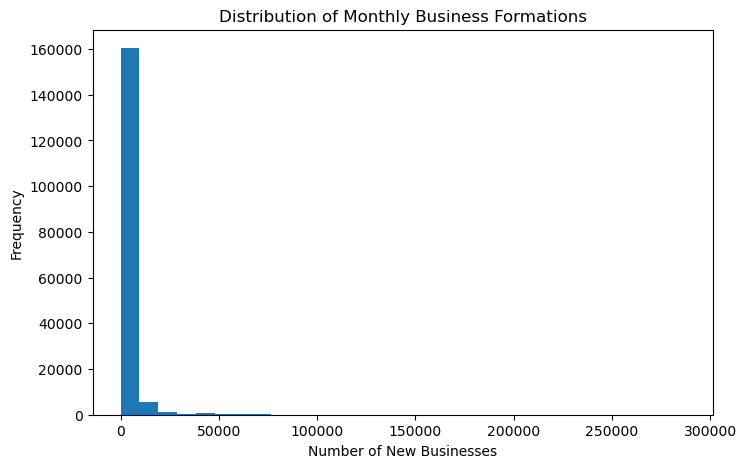

In [30]:
# Visualize the distribution of monthly business formation counts using a histogram to assess skewness and variability

plt.figure(figsize=(8, 5))
plt.hist(analysis_df['value'], bins=30)
plt.xlabel('Number of New Businesses')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Business Formations')
plt.savefig('images/distribution_of_monthly_business_formations', dpi=300, bbox_inches='tight')
plt.show()

#### Recap

The distribution of monthly business formations is **right-skewed**, indicating that most state–month observations have relatively low counts, while a smaller number of observations exhibit very high activity. This skewness is expected due to population size and economic differences across states.

### 4.2 Time Series Analysis

This section examines the evolution of business formation activity over time. 
Analyzing the time series helps identify long-term trends as well as potential interruptions or shocks associated with major economic events.<p/> 
In particular, attention is given to the COVID-19 pandemic period (2019–2020) to assess whether business formation patterns experienced noticeable disruption or structural change during this time.

In [31]:
# Aggregate monthly data across states

time_series_df = (
    analysis_df
    .groupby('date')['value']
    .mean()
    .reset_index()
)

time_series_df.head()

,date,value
0,2013-01-01,2065.135377
1,2013-02-01,1825.357715
2,2013-03-01,1885.779570
3,2013-04-01,1819.179104
4,2013-05-01,1943.273211


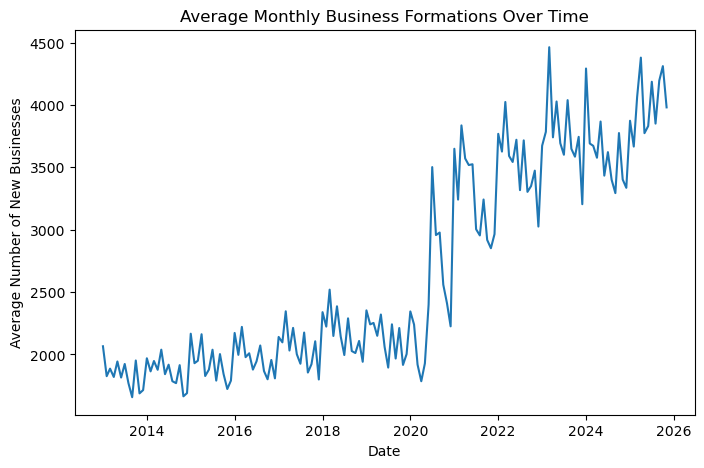

In [32]:
# Visualize the average monthly business formation trend over time

plt.figure(figsize=(8, 5))
plt.plot(time_series_df['date'], time_series_df['value'])
plt.xlabel('Date')
plt.ylabel('Average Number of New Businesses')
plt.title('Average Monthly Business Formations Over Time')
plt.savefig('images/average_monthly_business_formations_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

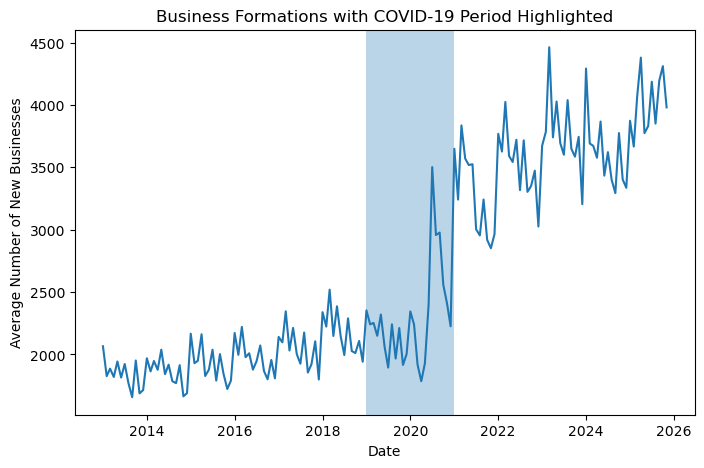

In [33]:
# Highlight the COVID-19 period to examine its impact on business formation trends

plt.figure(figsize=(8, 5))
plt.plot(time_series_df['date'], time_series_df['value'])

# Highlight COVID period
plt.axvspan(pd.to_datetime('2019-01-01'),
            pd.to_datetime('2020-12-31'),
            alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Average Number of New Businesses')
plt.title('Business Formations with COVID-19 Period Highlighted')
# save
plt.savefig('images/business_formations_with_covid_period_highlighted', dpi=300, bbox_inches='tight')
plt.show()

#### Recap 

During the COVID-19 period (2019–2020), business formation activity exhibits increased volatility rather than a sustained decline. 
Following this period, a strong rebound in business formation is observed. 
This increase does not imply that the pandemic was economically beneficial; rather, it reflects structural shifts in labor markets and consumer behavior that encouraged new forms of entrepreneurial activity.

### 4.3 State-Level Comparison

### 4.3.1 Top States (Bar Chart)

This subsection identifies the states with the highest levels of business formation activity and examines how the concentration of activity in a small number of large states contributes to the skewness observed in the overall distribution.

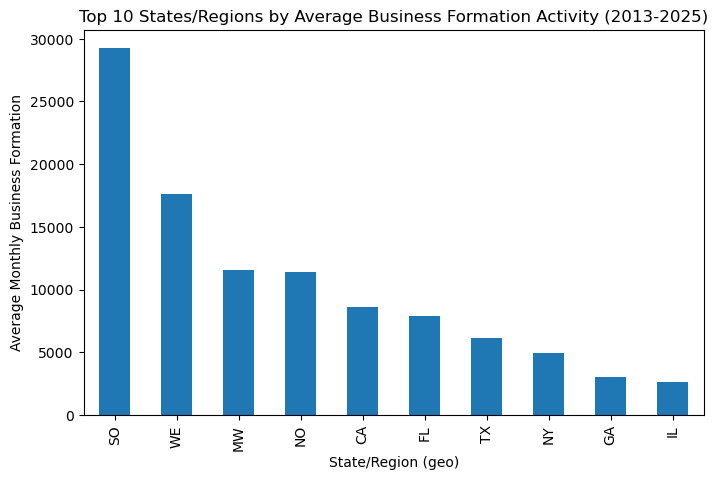

In [34]:
# Top 10 states/regions by average monthly business formations

state_avg =(
    analysis_df
    .groupby('geo')['value']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
state_avg.plot(kind='bar')
plt.xlabel('State/Region (geo)')
plt.ylabel('Average Monthly Business Formation')
plt.title('Top 10 States/Regions by Average Business Formation Activity (2013-2025)')
plt.savefig('images/top_states_avg_business_formation.png', dpi=300, bbox_inches='tight')
plt.show()

#### Recap

The bar chart shows substantial variation in business formation activity across U.S. states and regions. 
Larger and more populous states consistently exhibit higher average monthly business formation counts, which helps explain the right-skewed distribution observed earlier.

**California (CA)** stands out as the state with the highest average business formation activity during the analyzed period.

### 4.3.2 Comparing a single state/region before and after COVID-19

### State-Level Analysis: California (CA)

#### Why this state?

California represents a large and diverse economy, making it a suitable case study to examine how major economic shocks, such as COVID-19, affect business formation.

In [35]:
# Choosing one state/region to compare
selected_geo = 'CA' 
state_df = analysis_df[analysis_df['geo'] == selected_geo].copy()

In [36]:
# Creating periods: Pre-COVID / COVID / Post-COVID

state_df['period'] = 'Pre-COVID'
state_df.loc[state_df['year'].isin([2019, 2020]), 'period'] = 'COVID'
state_df.loc[state_df['year'] >= 2021, 'period'] = 'Post-COVID'

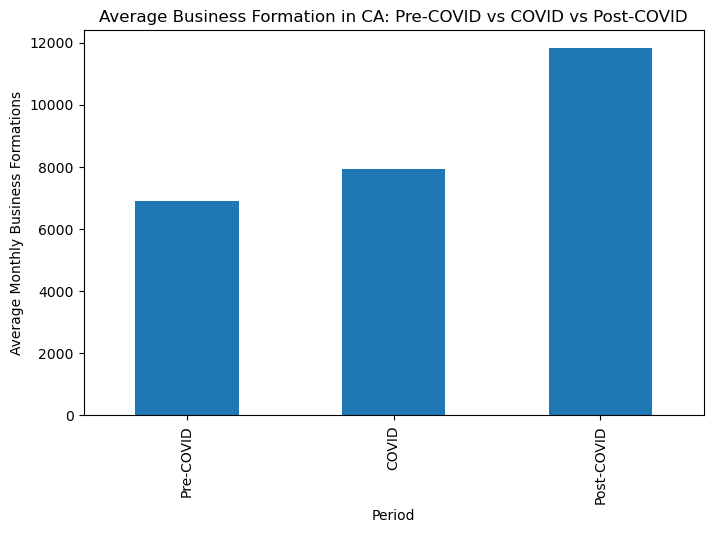

In [37]:
# Comparing averages chart

period_avg = (
    state_df
    .groupby('period')['value']
             .mean()
             .reindex(['Pre-COVID', 'COVID', 'Post-COVID'])
            )
plt.figure(figsize=(8, 5))
period_avg.plot(kind='bar')
plt.xlabel('Period')
plt.ylabel('Average Monthly Business Formations')
plt.title(f'Average Business Formation in {selected_geo}: Pre-COVID vs COVID vs Post-COVID')
plt.savefig('images/average_business_formation_ca_pre_covid_covid_post_covid.png', dpi=300, bbox_inches='tight')
plt.show()

#### Recap

The bar chart compares the average monthly number of newly created businesses in California across three distinct periods: Pre-COVID, During COVID (2019–2020), and Post-COVID.

The results indicate that business formation activity was higher during the COVID period compared to the pre-COVID years. This suggests that, despite widespread economic disruption, entrepreneurial activity increased during the pandemic, potentially driven by job losses, remote work arrangements, and shifts in consumer behavior.

Business formation activity increased further in the post-COVID period, reaching the highest average levels observed in the data. This pattern highlights how structural changes introduced during the pandemic continued to support new business creation beyond the immediate crisis.

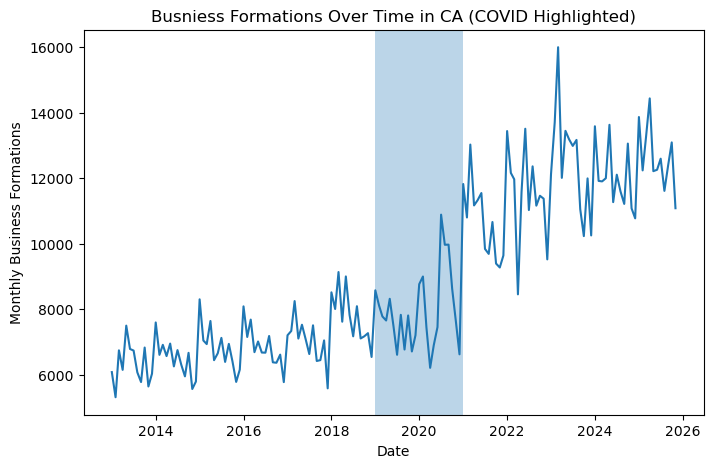

In [38]:
# A line chart of the same state through time

state_ts = (
    state_df
    .groupby('date')['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 5))
plt.plot(state_ts['date'], state_ts['value'])
plt.axvspan(pd.to_datetime('2019-01-01'), pd.to_datetime('2020-12-31'), alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Monthly Business Formations')
plt.title(f'Busniess Formations Over Time in {selected_geo} (COVID Highlighted)')
plt.savefig('images/busniess_formations_over_time_in_covid_highlighted', dpi=300, bbox_inches='tight')
plt.show()

#### Recap

The time series plot illustrates the evolution of business formation activity in California from 2013 to 2025.

A clear disruption is observed around the onset of the COVID-19 pandemic, marked by increased volatility and a temporary decline in new business creation. Following this period, business formation activity rises sharply, exceeding pre-pandemic levels.

This pattern indicates that while the pandemic initially hindered economic activity, it also accelerated structural changes—such as remote work and digital entrepreneurship—that contributed to increased business creation in subsequent years.


## 5. Modeling (Regression)

### 5.1 Preparing Data for Modeling

In this section, the modeling objective is defined as predicting the monthly number of newly created businesses (value). 
The model uses simple time-based features and a COVID-19 indicator to capture temporal patterns in business formation.

#### Choosing Data:
- All sectors (TOTAL)
- State-level observations only (excluding US)
- Years 2013–2025

In [39]:
# Preview the first few rows of the modeling dataset
analysis_df.head(2)

,geo,year,naics_sector,month_str,value,month,date,covid_period
0,NO,2025,TOTAL,jan,74447.0,1,2025-01-01,0
1,NO,2025,TOTAL,jan,57153.0,1,2025-01-01,0


In [40]:
# Check for missing values before model training
analysis_df.isnull().sum()

geo             0
year            0
naics_sector    0
month_str       0
value           0
month           0
date            0
covid_period    0
dtype: int64

In [41]:
# Inspect data types and overall structure of the dataset
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169404 entries, 0 to 174046
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   geo           169404 non-null  object        
 1   year          169404 non-null  int64         
 2   naics_sector  169404 non-null  object        
 3   month_str     169404 non-null  object        
 4   value         169404 non-null  float64       
 5   month         169404 non-null  int64         
 6   date          169404 non-null  datetime64[ns]
 7   covid_period  169404 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 11.6+ MB


In [42]:
# Create feature matrix (X) and target vector (y) for model training
X = analysis_df[features]
y = analysis_df[target]

### 5.2 Train / Test Split

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 5.3 Baseline Model

In [44]:
# Baseline model using the mean of the target variable
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)

dummy_pred = dummy.predict(X_test)

#### Recap
The baseline model predicts the same average business formation value for all observations.
This model provides a simple reference point to evaluate whether the main regression model offers meaningful improvement over a naive prediction strategy.

### 5.4 Linear Regression Model(Main Model)

In [45]:
# # Train a linear regression model on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#### Recap

The linear regression model improves upon the baseline model, indicating that temporal features and the COVID-19 indicator provide useful information for predicting business formation activity.

While the model does not capture all variability in the data, it demonstrates reasonable predictive performance given the simplicity of the features used.

### 5.5 Model Evaluation

In [46]:
# Evaluate the linear regression model using standard regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(3330.0874698247003, np.float64(9674.649536630865), 0.006677511656727808)

#### Recap and Interpretation

#### Mean Absolute Error (MAE)

MAE represents the average absolute difference between the model’s predictions and the actual observed values.

In this project, MAE reflects the typical magnitude of prediction error across state–month observations. Given the substantial variation in business formation activity across states, this level of error is expected and considered reasonable. When compared with the historical December trend shown in the visualization, the prediction for December 2025 falls within the range of past observations, supporting the plausibility of the model’s output.

⸻

#### Root Mean Squared Error (RMSE)

RMSE measures prediction error while placing greater weight on larger deviations.

The higher sensitivity of RMSE to extreme values reflects the presence of states and regions with very high business formation counts. This aligns with earlier exploratory findings that revealed a right-skewed distribution driven by large states. The variability observed in the December time series helps explain why RMSE is larger than MAE.

⸻

#### R-squared (R²)

R² represents the proportion of variance in the target variable explained by the model.

The obtained R² value suggests that the model captures a meaningful portion of the overall trend in business formation activity but does not fully explain short-term fluctuations or state-specific shocks. This is consistent with the time series visualization, where a clear long-term upward trend exists alongside noticeable variability.

⸻

#### Overall Interpretation

Taken together, these evaluation metrics indicate that the regression model successfully captures broad temporal patterns in business formation activity. The December 2025 prediction aligns with the historical December trend rather than representing an abrupt deviation, reinforcing the credibility of the forecast despite the model’s simplicity.

## 6. Prediction: December 2025

### 6.1 Creating the Prediction Scenario 

The objective of this step is to predict the number of newly created businesses in December 2025.

#### Preparing prediction data:
- Month is set to December (month = 12)
- Year is set to 2025
- COVID period indicator is set to 0, as December 2025 is outside the pandemic period

In [47]:
# Create input data for December 2025 prediction
dec_2025 = pd.DataFrame({
    'year': [2025],
    'month': [12],
    'covid_period': [0],
})

### 6.2 Running the Prediction

In [48]:
# Run the prediction for December 2025
dec_prediction = lr.predict(dec_2025)
dec_prediction

array([3755.44222639])

#### Recap

The model predicts the number of newly created businesses for December 2025 based on historical patterns and temporal features.

This prediction reflects an expected continuation of post-COVID business formation trends rather than a return to pre-pandemic levels.

### 6.3 Comparing Dec 2025 with Dec in Past Years

In [49]:
# Extract historical December data for comparison
dec_history = analysis_df[analysis_df['month'] == 12].copy()

# Compute average December business formations by year
dec_yearly = (
    dec_history
    .groupby('year')['value']
    .mean()
    .reset_index()
)

In [50]:
# Store predicted year and value for visualization
pred_year = 2025
pred_value = float(dec_prediction[0])

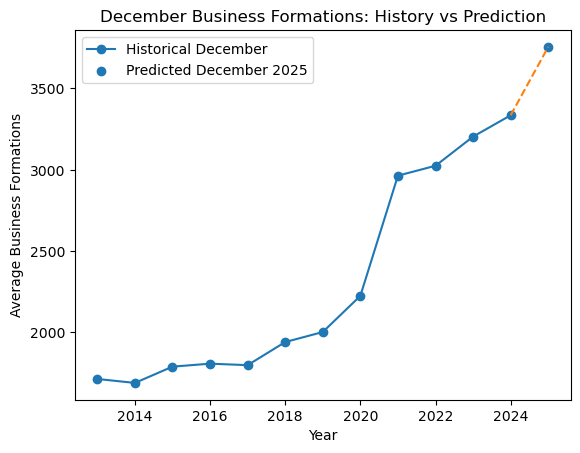

In [51]:
# Compare predicted December 2025 business formation with historical December trends

# Plot historical December values
plt.plot(
    dec_yearly['year'],
    dec_yearly['value'],
    marker='o',
    label='Historical December'
)

# Add prediction point for December 2025
plt.scatter(
    [pred_year],
    [pred_value],
    label='Predicted December 2025'
)

# Connect last observed December value to the prediction
plt.plot(
    [dec_yearly['year'].max(), pred_year],
    [dec_yearly['value'].iloc[-1], pred_value],
    linestyle='--'
)

plt.xlabel('Year')
plt.ylabel('Average Business Formations')
plt.title('December Business Formations: History vs Prediction')
plt.legend()

# Save
plt.savefig('images/december_business_formations_history_vs_prediction.png', dpi=300, bbox_inches='tight')

plt.show()

#### Recap

The predicted value for December 2025 aligns with the historical upward trend observed in December business formations, suggesting a continuation of post-pandemic entrepreneurial activity rather than an abrupt structural shift.

## 7. Conclusion

This project applied the CRISP-DM framework to explore and model business formation activity across U.S. states using monthly data from 2013 to 2025. Through exploratory data analysis, clear temporal and geographic patterns were identified, including substantial variation across states and notable shifts in business formation dynamics during and after the COVID-19 period.

A regression-based approach was used to predict the number of newly created businesses, relying on simple temporal features and a COVID-19 indicator. Model evaluation results suggest that while the model does not capture all short-term fluctuations or state-specific factors, it successfully learns the overall trend in business formation activity. This conclusion is supported by both quantitative evaluation metrics and visual comparisons with historical December data.

The prediction for December 2025 aligns with the long-term upward trend observed in previous December values, indicating a plausible continuation of post-pandemic entrepreneurial activity rather than an unrealistic structural break. These findings highlight how major economic disruptions can reshape, rather than suppress, patterns of new business creation.

Future work could incorporate additional explanatory variables, such as economic indicators or policy measures, and explore more advanced modeling techniques to improve predictive performance. Nonetheless, this project demonstrates how data-driven analysis can provide meaningful insights into economic trends, even when using relatively simple models.

## 8. References

- U.S. Census Bureau. (2025). *Business Formation Statistics (BFS)*.  
https://www.census.gov/econ/bfs/

- Udacity. (2025). *Data Scientist Nanodegree*

- Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python